# Anibal Muñoz
# 21.087.122-5
# Diego Vergara
# 19.940.239-0
# Cristobal Galaz
# 20.359.833-5

In [90]:
#------Manejo de datos------
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#------Modelos------
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.regularizers import l2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#------Reportes------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [69]:
data_train = pd.read_excel("data_train.xlsx")
data_test = pd.read_excel("data_test.xlsx")

In [70]:
data_test = pd.DataFrame(data_test)
data_test.shape

(103284, 24)

In [71]:
data_train = pd.DataFrame(data_train)
data_train.shape

(25810, 24)

In [72]:
data = pd.read_excel("data.xlsx")
X = data[["Departure Delay in Minutes", "Flight Distance", "Customer Type_encoded", "Type of Travel_encoded"]]
y = data["Arrival Delay in Minutes"]

In [73]:
# Se decide que se va a realizar regresion a las variables relacionadas con el atraso de los vuelos
X_train = data_train[["Departure Delay in Minutes", "Flight Distance", "Customer Type_encoded", "Type of Travel_encoded"]]
y_train = data_train["Arrival Delay in Minutes"]
X_test = data_test[["Departure Delay in Minutes", "Flight Distance", "Customer Type_encoded", "Type of Travel_encoded"]]
y_test = data_test["Arrival Delay in Minutes"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25810, 4)
(25810,)
(103284, 4)
(103284,)


In [74]:
# Escaladores
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# Escalar X
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# Escalar y
#y_train_scaled = scaler_y.fit_transform(y_train)
#y_test_scaled = scaler_y.transform(y_test)
y_train_scaled = y_train
y_test_scaled = y_test

# corroborar formas
print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

(25810, 4)
(25810,)
(103284, 4)
(103284,)


# Con los datos cargados se procedera a realizar regresion

MSE KNN: 135.07052506788185
MSE Random Forest: 126.04820628484332
MSE Regresión Lineal: 2014203.4893548184
MSE Regresión Polinómica: 101.26006495986194
Epoch 1/50


D:\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1359.0757 - val_loss: 100.6773
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 109.0643 - val_loss: 100.2848
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 111.0700 - val_loss: 100.4073
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 113.5344 - val_loss: 102.0737
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 109.4176 - val_loss: 99.3275
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 105.0942 - val_loss: 98.9621
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 108.6744 - val_loss: 99.6043
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 111.2208 - val_loss: 99.7341
Epoch 9/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 103.3669 - val_loss: 99.7328
Epoch 10/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 112.3634 - val_loss: 98.5303
Epoch 11/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 110.5347 - val_loss: 98.9850
Epoch 12/50
20

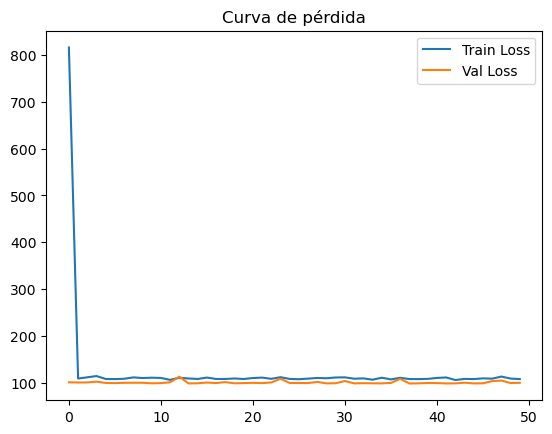

3228/3228 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
MSE: 0.01185351199944051
MSE Red Neuronal: 0.01185351199944051


In [125]:
#knn
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train_scaled)
y_pred = knn.predict(X_test_scaled)
print("MSE KNN:", mean_squared_error(y_test_scaled, y_pred))

#random forest regression
rf = RandomForestRegressor(n_estimators=100, random_state=366)
rf.fit(X_train_scaled, y_train_scaled)
y_pred = rf.predict(X_test_scaled)
print("MSE Random Forest:", mean_squared_error(y_test_scaled, y_pred))

#regresion lineal multiple
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred = lr.predict(X_test)
print("MSE Regresión Lineal:", mean_squared_error(y_test_scaled, y_pred))

#regresion polinomica multiple
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train_scaled)
y_pred = poly_model.predict(X_test_scaled)
print("MSE Regresión Polinómica:", mean_squared_error(y_test_scaled, y_pred))

#Red Neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas y ReLU
    Dense(32, activation='relu'),  # Otra capa oculta para mayor complejidad
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)  
])
model.compile(optimizer='adam', loss='mse')
# Entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128,
                    validation_data=(X_test_scaled, y_test), verbose=1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Curva de pérdida")
plt.show()
# Evaluación
y_pred = model.predict(X_test_scaled)
#y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Desnormalizamos la predicción
y_true = y_test_scaled
mean_squared_error(y_true, y_pred)
print("MSE:", mse)
print("MSE Red Neuronal:", mse)

In [116]:
models = [ knn, rf, lr, poly_model, model]
nombres = [ 'KNN', 'random forest regression', 'regresion lineal multiple', 'regresion polinomica multiple', 'Red Neuronal']

KNN - MSE: 135.0705, R²: 0.9098


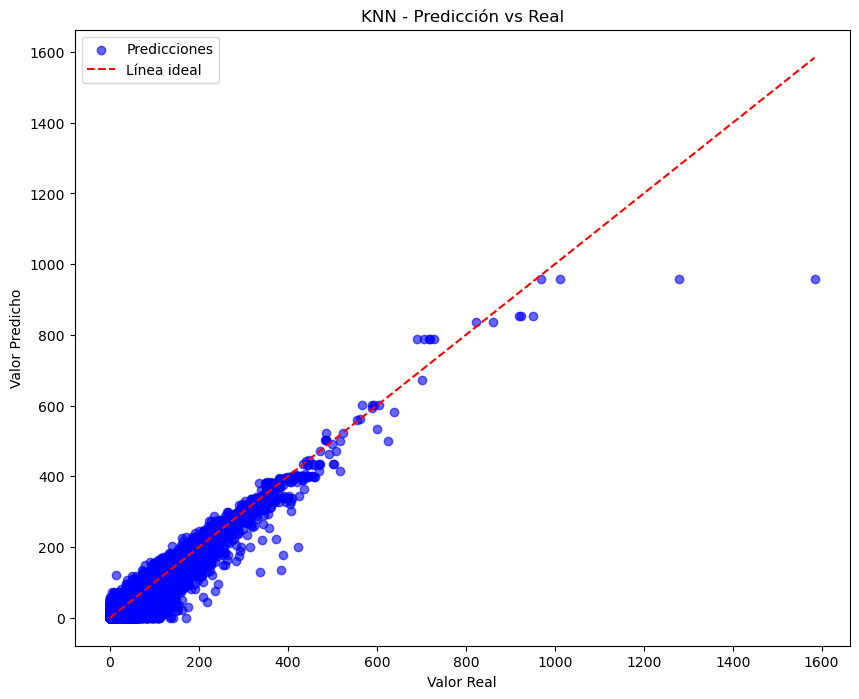

random forest regression - MSE: 126.0482, R²: 0.9158


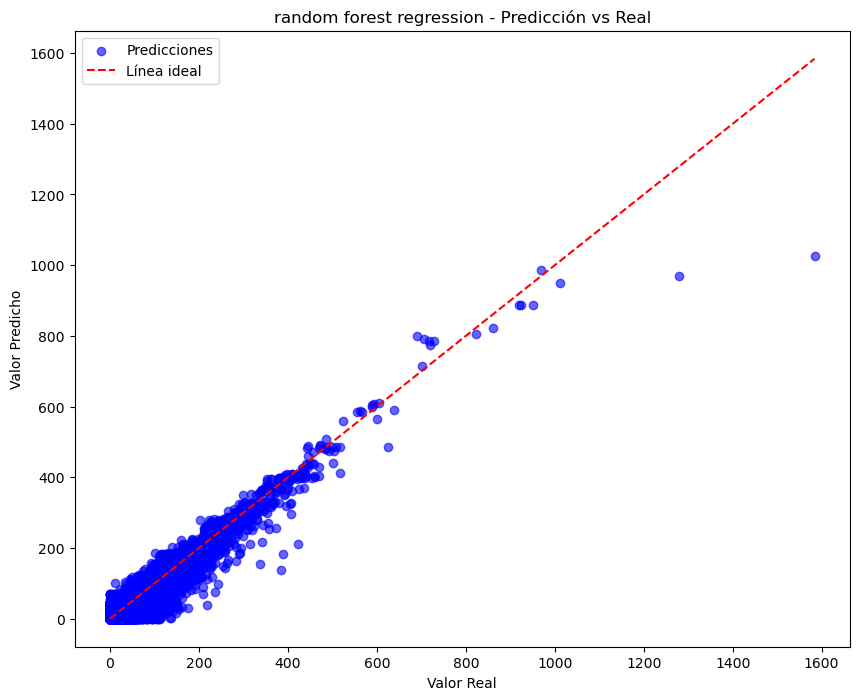

regresion lineal multiple - MSE: 101.6252, R²: 0.9321


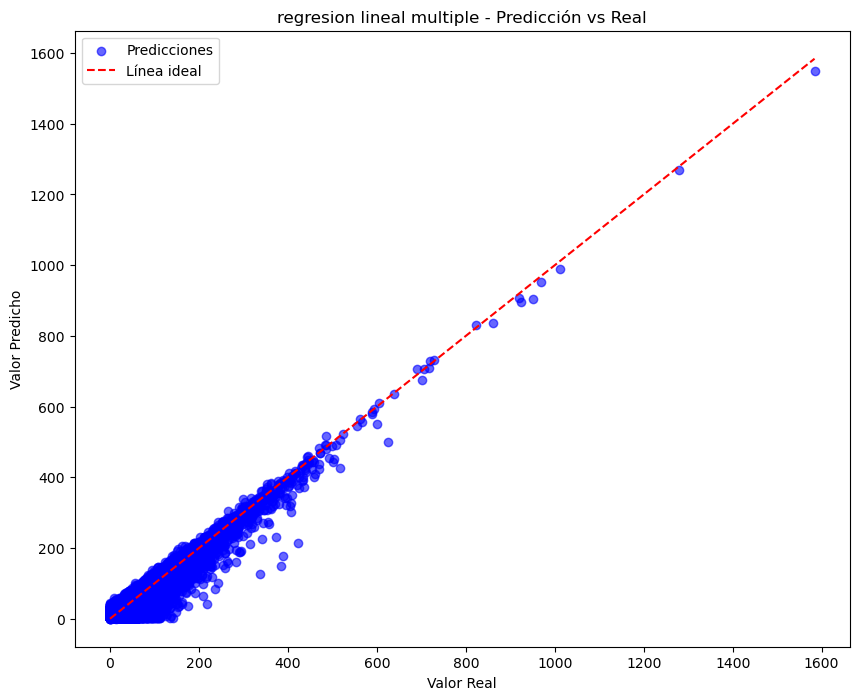

regresion polinomica multiple - MSE: 101.2601, R²: 0.9324


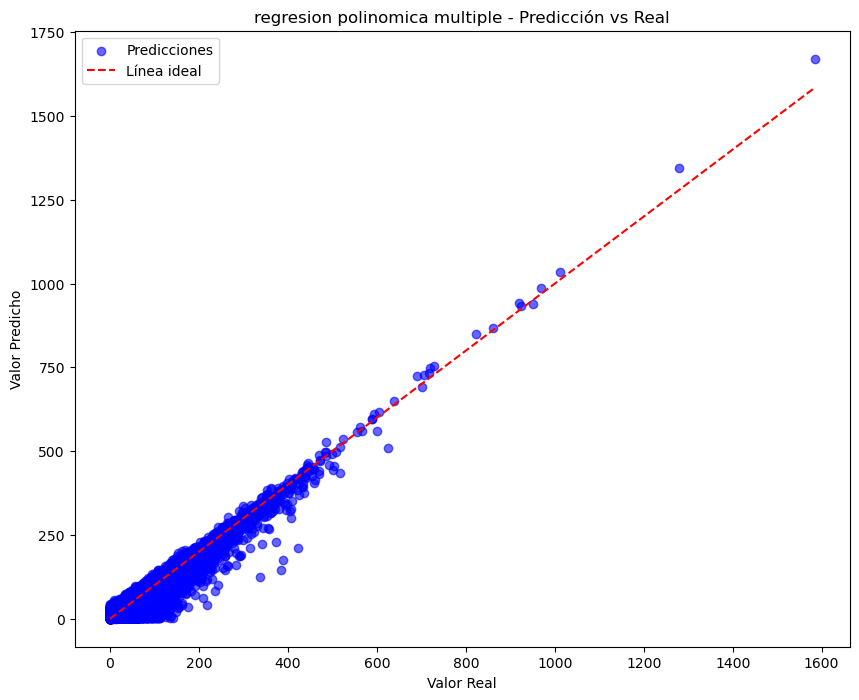

3228/3228 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Red Neuronal - MSE: 98.8294, R²: 0.9340


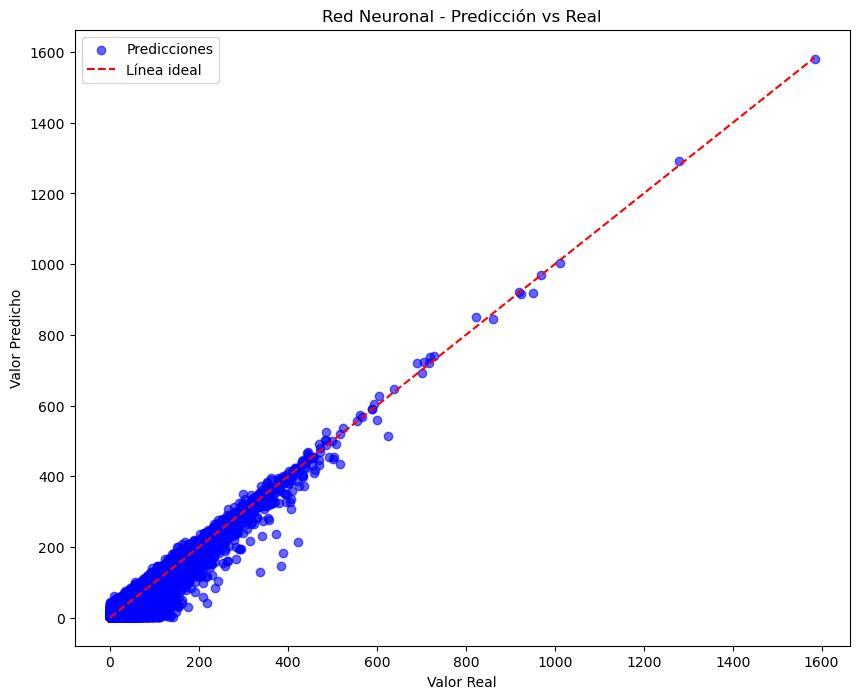

In [118]:
def modelo_report(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, nombres, scaler_y=None):
    # Predicciones
    y_pred_scaled = model.predict(X_test_scaled)
    if scaler_y:
        y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Desnormalizamos la predicción
        y_true = scaler_y.inverse_transform(y_test_scaled)
    else:
        y_pred = y_pred_scaled
        y_true = y_test_scaled
    # Cálculo de MSE y R²
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # Mostrar el MSE y R²
    print(f"{nombres} - MSE: {mse:.4f}, R²: {r2:.4f}")
    # Gráfico Predicción vs Real
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_pred, color='blue', label='Predicciones', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Línea ideal')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(f'{nombres} - Predicción vs Real')
    plt.legend()
    plt.show()

for i in range (len(models)):
    modelo_report(models[i], X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, nombres[i], scaler_y=None)

Modelo:  KNN


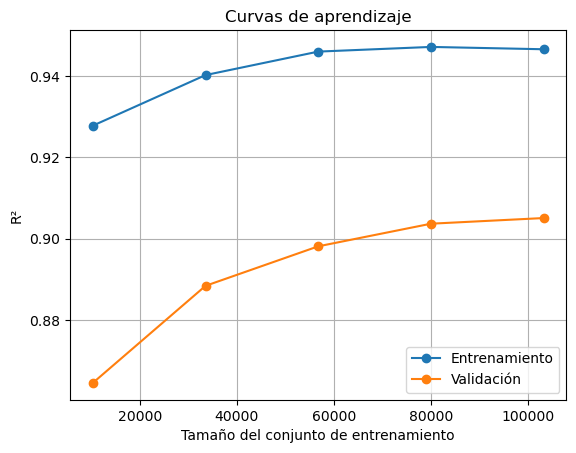

Modelo:  random forest regression


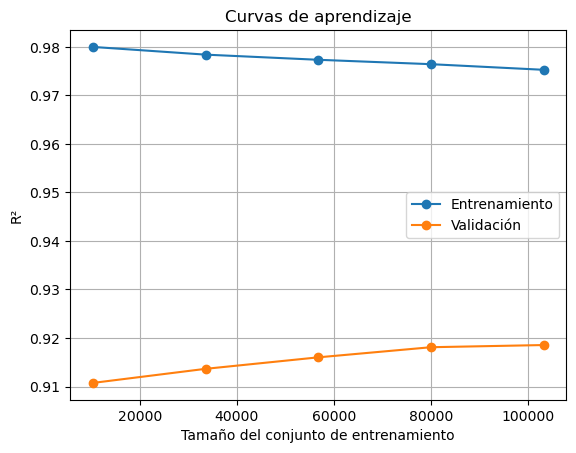

Modelo:  regresion lineal multiple


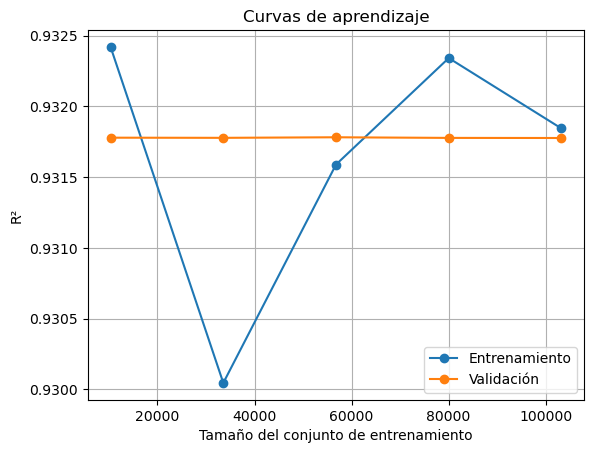

Modelo:  regresion polinomica multiple


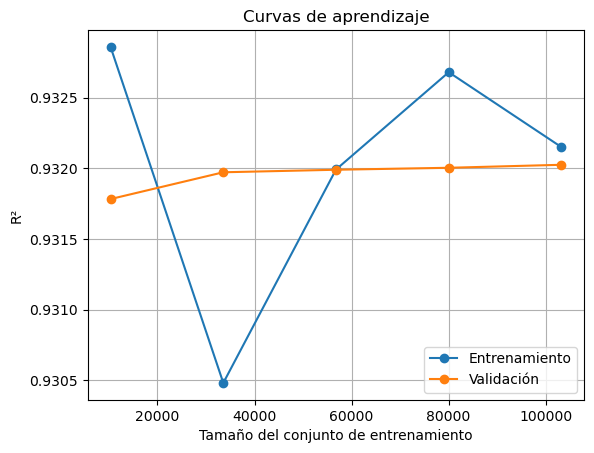

In [119]:
for i in range (len(models) - 1):
    print("Modelo: ", nombres[i])
    
    train_sizes, train_scores, test_scores = learning_curve(models[i], X, y, cv=5, scoring='r2')

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Validación")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("R²")
    plt.title("Curvas de aprendizaje")
    plt.legend()
    plt.grid()
    plt.show()

# Validacion cruzada

In [130]:
for i in range (len(models)):
    print("Modelo: ", nombres[i])
    # Predicciones
    y_train_pred = models[i].predict(X_train_scaled)
    y_test_pred = models[i].predict(X_test_scaled)

    # Métricas
    print("Train R²:", r2_score(y_train_scaled, y_train_pred))
    print("Test R²:", r2_score(y_test_scaled, y_test_pred))
    print("Train RMSE:", mean_squared_error(y_train_scaled, y_train_pred, squared=False))
    print("Test RMSE:", mean_squared_error(y_test_scaled, y_test_pred, squared=False))
    print("-"*50)

Modelo:  KNN
Train R²: 0.9506745219947471
Test R²: 0.9097904372209501
Train RMSE: 8.338635792049196
Test RMSE: 11.621984558064163
--------------------------------------------------
Modelo:  random forest regression


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train R²: 0.9788453310231685
Test R²: 0.9158161740148367
Train RMSE: 5.460877962193124
Test RMSE: 11.227119233572044
--------------------------------------------------
Modelo:  regresion lineal multiple
Train R²: 0.9304201971912173
Test R²: 0.9321275983821937
Train RMSE: 9.903779236415907
Test RMSE: 10.08093033291817
--------------------------------------------------
Modelo:  regresion polinomica multiple
Train R²: 0.9307289967649118
Test R²: 0.9323714320173363
Train RMSE: 9.88177799865441
Test RMSE: 10.062806018197008
--------------------------------------------------
Modelo:  Red Neuronal
 93/807 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


807/807 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
3228/3228 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Train R²: 0.9325612187385559
Test R²: 0.9339947700500488
Train RMSE: 9.75021609046238
Test RMSE: 9.94129931647837
--------------------------------------------------


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [122]:
for i in range (len(models) - 1):
    print("Modelo: ", nombres[i])

    scores = cross_val_score(models[i], X, y, cv=5, scoring='r2')
    print("R² (CV):", scores)
    print("Promedio:", scores.mean(), "Desviación:", scores.std())
    print("-"*50)

Modelo:  KNN
R² (CV): [0.90148197 0.91113866 0.90546834 0.90327047 0.90282688]
Promedio: 0.9048372627835098 Desviación: 0.003401774377556741
--------------------------------------------------
Modelo:  random forest regression
R² (CV): [0.91697137 0.92035948 0.92201168 0.91655272 0.91686691]
Promedio: 0.9185524301691 Desviación: 0.0022168175674112745
--------------------------------------------------
Modelo:  regresion lineal multiple
R² (CV): [0.92866954 0.93321544 0.9335827  0.93301588 0.93039985]
Promedio: 0.9317766822103847 Desviación: 0.0019192363252114025
--------------------------------------------------
Modelo:  regresion polinomica multiple
R² (CV): [0.92900183 0.9334596  0.9340253  0.93298476 0.93065053]
Promedio: 0.9320244024695163 Desviación: 0.001897848275982756
--------------------------------------------------
